### 1. Escalando e transformando um array para media 0 e desvio padrão 1 (axis = x)

In [223]:
from sklearn import preprocessing
import numpy as np

In [114]:
X_train = np.array([[1],[4],[7]])
X_train.shape

(3, 1)

In [115]:
X_scaled = preprocessing.scale(X_train)
X_scaled

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [116]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 0.]
[ 1.]


### 2. Salvando as transformações para poder aplicar as mesmas transformações em um label

In [117]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [118]:
# Inspeção - todos hiperparametros estimados são acessados diretamente da variavel de instancia (e.g. imputer.strategy),
# e todos parametros aprendidos são acessados com um sufixo underscore
print (scaler.with_mean) # inspeção
print(scaler.mean_) # parametros aprendidos
print(scaler.scale_)

True
[ 4.]
[ 2.44948974]


In [119]:
scaler.transform(X_train)

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

### 3. teste em uma imagem

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from skimage.io import imread
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [242]:
path_ini = os.getcwd()
TRAIN_IMG_PATH = "C:/Users/Tales/algoritmos_fcs/Data/Sunny_B/images/"
TRAIN_LBL_PATH = "C:/Users/Tales/algoritmos_fcs/Data/Sunny_B/label/"
X_train = [imread(fname=TRAIN_IMG_PATH + img, as_grey=True) for img in os.listdir(TRAIN_IMG_PATH)]
y_train = [imread(fname=TRAIN_LBL_PATH + lbl, as_grey=True) for lbl in os.listdir(TRAIN_LBL_PATH)]

In [243]:
X_train = np.asarray(X_train)/255
y_train = np.asarray(y_train)
print (X_train.shape)
print (y_train.shape)
len(X_train)

(2, 256, 256)
(2, 256, 256)


2

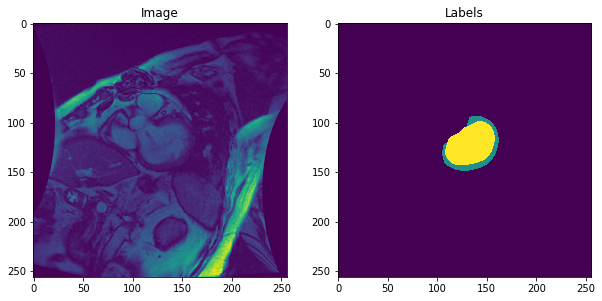

In [244]:
idx = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(X_train[idx])
ax[0].set_title('Image')

ax[1].imshow(y_train[idx])
ax[1].set_title('Labels')

plt.show()

In [245]:
num_pipeline = Pipeline([('zero_mean',StandardScaler()),('min_max',MinMaxScaler())])

In [246]:
n_Xtrain = len(X_train)
n_ytrain = len(y_train)
X_train_tr = np.zeros([n_Xtrain,256,256])
y_train_tr = np.zeros([n_Xtrain,256,256])

In [254]:
for ii in range(n_Xtrain):
    X_train_tr[ii,:,:] = num_pipeline.fit_transform(X_train[ii]).astype(np.int8)
    y_train_tr[ii,:,:] = num_pipeline.fit_transform(y_train[ii]).astype(np.int8)

In [250]:
idx = 0

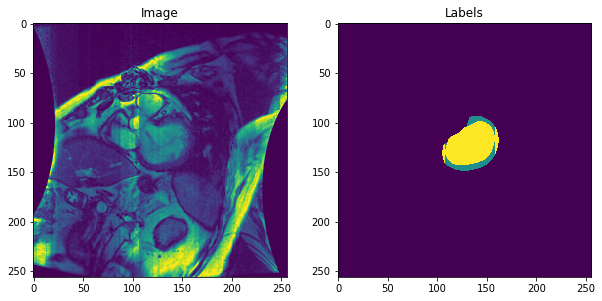

In [251]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(X_train_tr[idx])
ax[0].set_title('Image')

ax[1].imshow(y_train_tr[idx])
ax[1].set_title('Labels')

plt.show()